# Implication of Perceptron

In [1]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
import os

set_nb_theme('monokai')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib # FOR SAVING CREATED MODEL AS A BINARY FILE ( ALT : pickle)
from matplotlib.colors import ListedColormap

plt.style.use('fivethirtyeight')  # THIS IS STYLE OF GRAPHS 

In [3]:
class Perceptron:
    '''
    Functions in this class:
        * main function
        * activationFunction
        * fit function
        * predict 
        * total_loss
    '''
    
    def __init__(self, eta, epochs):
        # eta - learning rate
        # epoch = forward + backward
        
        self.weights = np.random.randn(3) * 1e-4 # SMALL WEIGHT INITIALIZATION
        print(f"initial weights before training: {self.weights}")
        self.eta = eta # LEARNING RATE
        self.epochs = epochs
    
    def activationFunction(self, inputs, weights):
        z = np.dot(inputs, weights) # z = X * W
        return np.where(z > 0, 1, 0)
    
    def fit(self, X, y):
        self.X = X
        self.y = y 
        
        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))] # CONCAT THE X ARRAY WITH THE NEW ARRAY CONSISTING OF SIZE (SIZE_OF_X_ARRAY, 1)
                                                                # CREATING A NEW ARRAY i.e array with the corresponding bias and concatinating to X array 
        print(f"X with bias : \n{X_with_bias}")
        
        #  TRAINING LOOP
        for epoch in range(self.epochs):
            print('--'*10)
            print(f"for epoch: {epoch}")
            print('--'*10)
            
            '''FORWARD PROPAGATION'''
            y_hat = self.activationFunction(X_with_bias, self.weights) # y_hat -> Predicated value
            print(f"Predicted value after forward pass: {y_hat}")
            
            '''ERROR'''
            self.error = self.y - y_hat
            print(f"Error: \n{self.error}")
            
            '''BACKWARD PROPAGATION'''
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error)
            print(f"Updated weights after epoch: {epoch}/{self.epochs} : {self.weights}")
            
            print("#####"*10)
    
    def predict(self, X):
        X_with_bias = np.c_[X, -np.ones((len(X), 1), dtype=int)]
        return self.activationFunction(X_with_bias, self.weights)
    
    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"Total Loss: {total_loss}")
        return total_loss

In [4]:
def prepare_data(df):
    X = df.drop("y", axis = 1)
    y = df['y']
    return X, y

#### Creating Data for the inputs: AND, OR, XOR gate

In [5]:
AND = {
    'x1': [0,0,1,1],
    'x2': [0,1,0,1],
    'y' : [0,0,0,1]
}

OR = {
    'x1': [0,0,1,1],
    'x2': [0,1,0,1],
    'y' : [0,1,1,1]
}

XOR = {
    'x1': [0,0,1,1],
    'x2': [0,1,0,1],
    'y' : [0,1,1,0]
}

# creating the dataframe
df = pd.DataFrame(OR)
print(df)


   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  1


In [6]:
# Class and functions call

X, y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model = Perceptron(eta = ETA, epochs = EPOCHS)
model.fit(X, y)

_ = model.total_loss()

initial weights before training: [ 3.33876222e-05 -2.39934820e-05 -8.77929581e-05]
X with bias : 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
Predicted value after forward pass: [1 1 1 1]
Error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights after epoch: 0/10 : [ 3.33876222e-05 -2.39934820e-05  2.99912207e-01]
##################################################
--------------------
for epoch: 1
--------------------
Predicted value after forward pass: [0 0 0 0]
Error: 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
Updated weights after epoch: 1/10 : [ 0.60003339  0.59997601 -0.60008779]
##################################################
--------------------
for epoch: 2
--------------------
Predicted value after forward pass: [1 1 1 1]
Error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights after epoch: 2/10 : [ 0.60003339  0.59997601 -0.30008779]
############################

In [7]:
inputs = np.array([[1,1], [0,1]])
model.predict(inputs)

array([1, 1])

### Save the model

In [8]:
def save_model(model, filename):
    model_dir = 'models'
    os.makedirs(model_dir, exist_ok = True) #ONLY CREATE IF MODEL_DIR DOESNOT EXISTS
    filePath = os.path.join(model_dir, filename) # model/filename
    joblib.dump(model, filePath)

In [9]:
save_model(model, "or.model")

In [10]:
loaded_model = joblib.load("models/and.model")
loaded_model.predict(inputs)

array([1, 0])

##### There exists an issue with the XOR gate always. To visualize it we plot for the visualization

In [11]:
def save_plot(df, file_name, model):
    def _create_base_plot(df):
        df.plot(kind ="scatter", x='x1', y='x2', c='y', s= 100, cmap='winter')
        plt.axhline(y=0, color="black", linestyle= "--", linewidth=1)
        plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
        figure = plt.gcf() # get current figure
        figure.set_size_inches(10,8)
    def _plot_decision_regions(X, y, classifier, resolution=0.02):
        colors = ("red", "blue", 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])
        
        X = X.values # as an array
        x1 = X[:, 0] # all row, 0 th column
        x2 = X[:, 1] # all row, 1 st column
        x1_min, x1_max = x1.min() - 1, x1.max() + 1
        x2_min, x2_max = x2.min() - 1, x2.max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                              np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha = 0.2, cmap = cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        plt.plot()
        
    
    X, y = prepare_data(df)
    
    _create_base_plot(df)
    _plot_decision_regions(X, y, model)
    
    plot_dir = "plots"
    os.makedirs(plot_dir, exist_ok = True)
    plotPath = os.path.join(plot_dir, file_name)
    plt.savefig(plotPath)

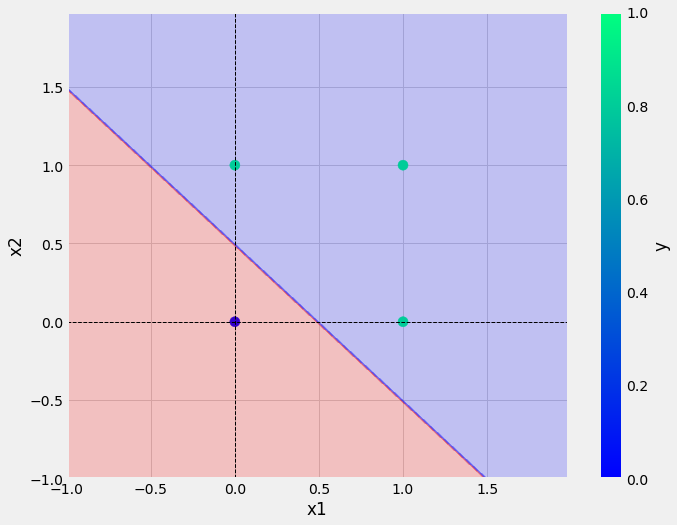

In [12]:
save_plot(df, 'or.png', model)

In [13]:
-np.ones((4, 1))

array([[-1.],
       [-1.],
       [-1.],
       [-1.]])

In [14]:
np.random.randn(3) * 1e-4

array([-5.51958052e-06, -3.57877922e-05,  4.91424726e-05])

In [15]:
print(1e+4)
print(1e-4)

10000.0
0.0001
